# Load image

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [15, 10]

(<matplotlib.image.AxesImage at 0x1573a5a30>,
 (np.float64(-0.5), np.float64(633.5), np.float64(452.5), np.float64(-0.5)))

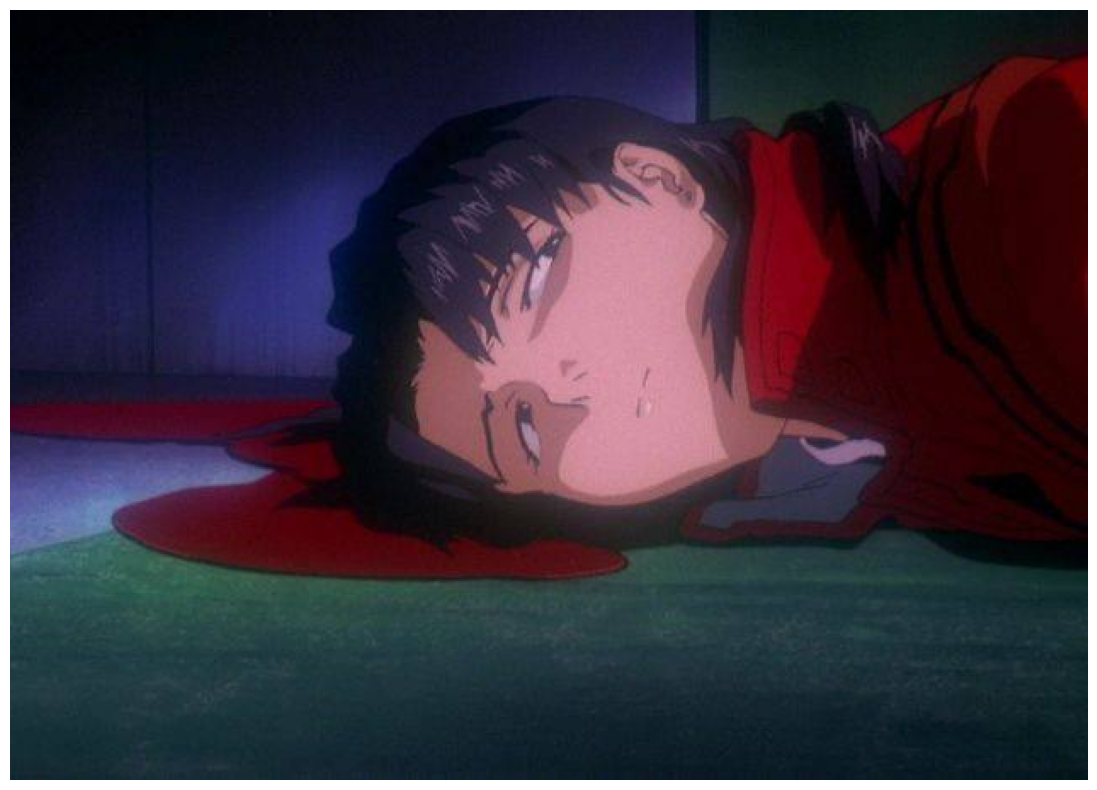

In [52]:
img = cv2.imread('../misato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

# Invert image

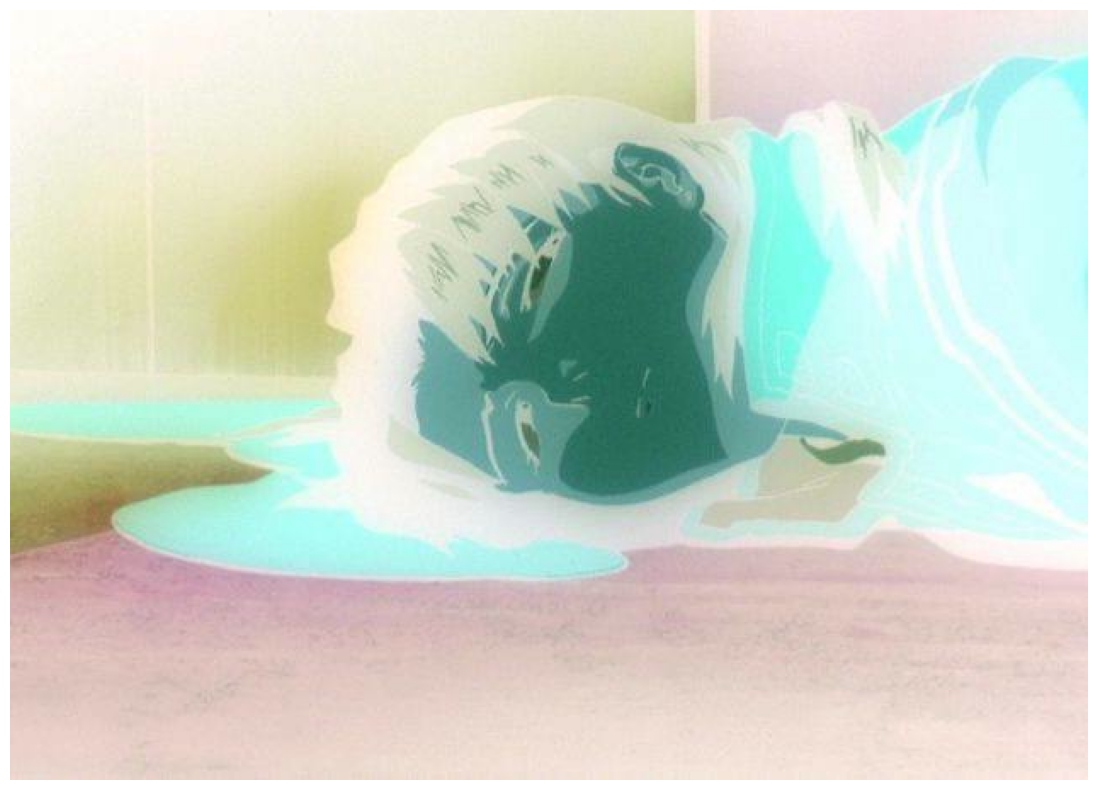

In [4]:
inverted_img = 255 - img
plt.imshow(inverted_img)
plt.axis('off')
plt.show()

# Add constant to a selcted channel

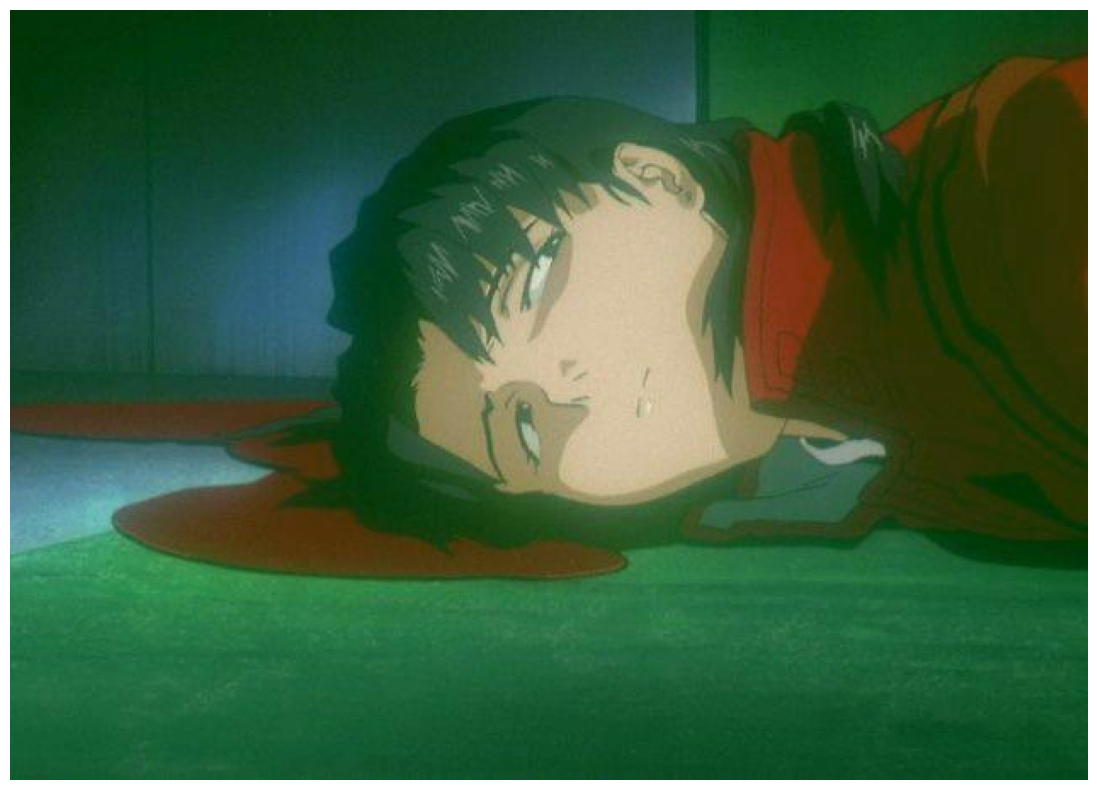

In [17]:
modified_img = img.copy()
constant_value = 50
modified_img[:, :, 1] = np.clip(modified_img[:, :, 1] + constant_value, 0, 255).astype(np.uint8)
plt.imshow(modified_img)
plt.axis('off')
plt.show()

# Split components

In [19]:
red_channel = img[:, :, 0]   
green_channel = img[:, :, 1] 
blue_channel = img[:, :, 2]  

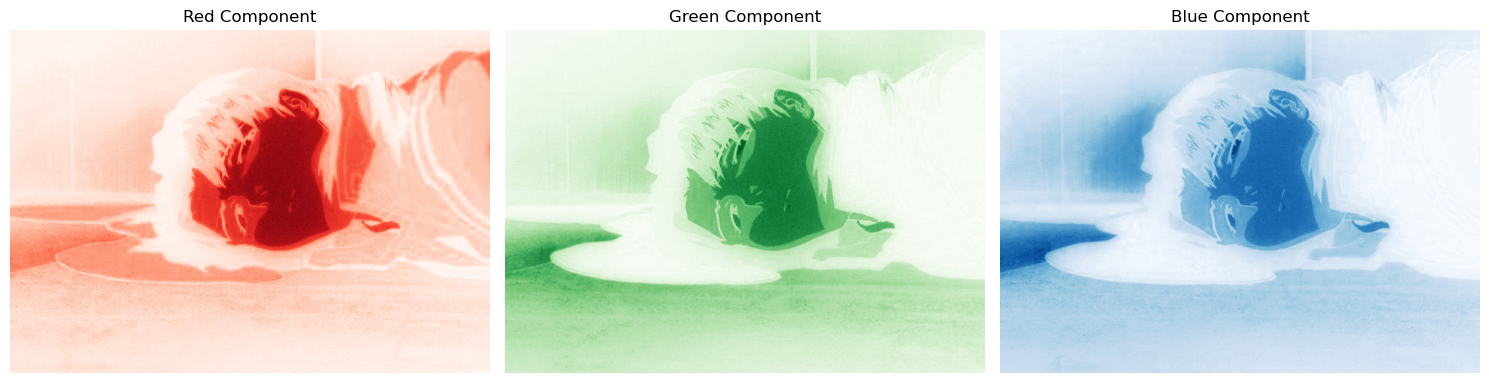

In [22]:
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Component')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Component')
plt.axis('off')

plt.tight_layout()
plt.show()

# Merge images

(<matplotlib.image.AxesImage at 0x140010fe0>,
 (np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5)))

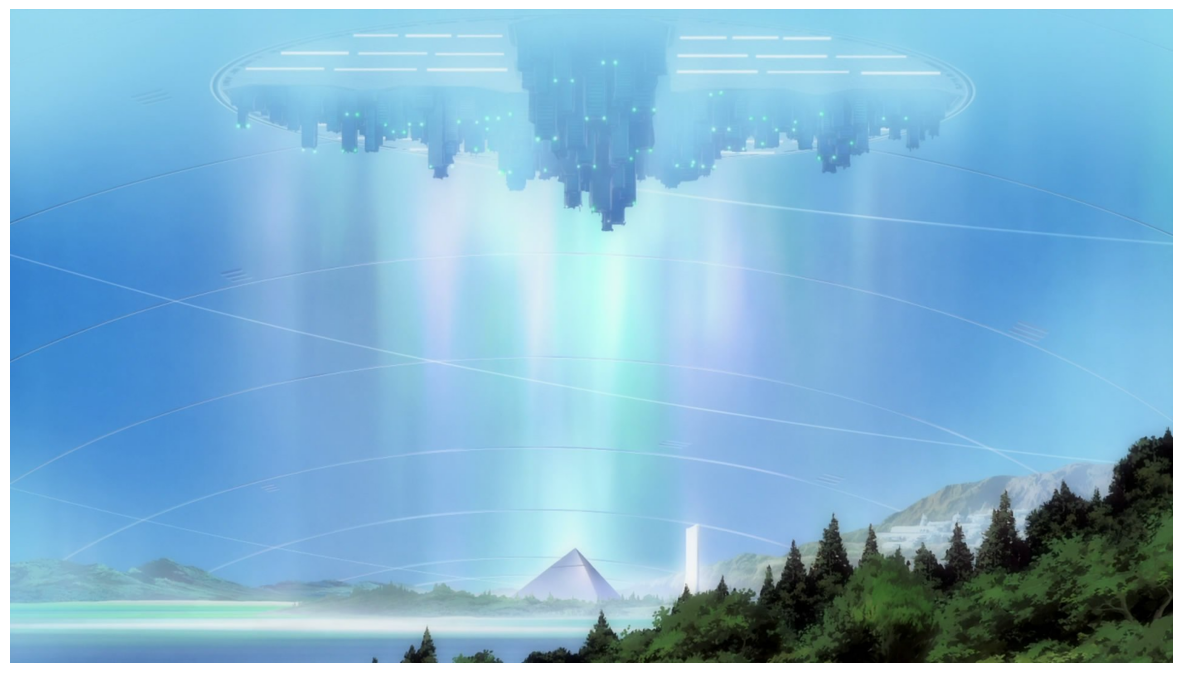

In [24]:
img1 = cv2.imread('../tokyo3.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1), plt.axis('off')

In [35]:
def blend_images(alpha, image1, image2):
    return (alpha * image1 + (1 - alpha) * image2).astype(np.uint8)
    
def update(frame):
    blended_image = blend_images(alpha_values[frame], image1, image2)
    im.set_array(blended_image)
    return [im]

In [36]:
image1 = cv2.resize(img, (min(img.shape[1], img1.shape[1]), min(img.shape[0], img1.shape[0])))
image2 = cv2.resize(img1, (img.shape[1], img.shape[0]))

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')

alpha_values = np.linspace(0.1, 0.9, 20)  
im = ax.imshow(blend_images(alpha_values[0], image1, image2))

ani = animation.FuncAnimation(fig, update, frames=len(alpha_values), interval=200, blit=True)
plt.close(fig)  
display(HTML(ani.to_jshtml()))

# Filters

## Blur

In [39]:
blurred_image = cv2.blur(img, (5, 5))

## Sharpen

In [40]:
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(img, -1, sharpening_kernel)

## Median filter

In [42]:
median_filtered_image = cv2.medianBlur(img, 5)

## Erosion and dialation

In [44]:
eroded_image = cv2.erode(img, np.ones((5, 5), np.uint8), iterations=1)
dilated_image = cv2.dilate(img, np.ones((5, 5), np.uint8), iterations=1)

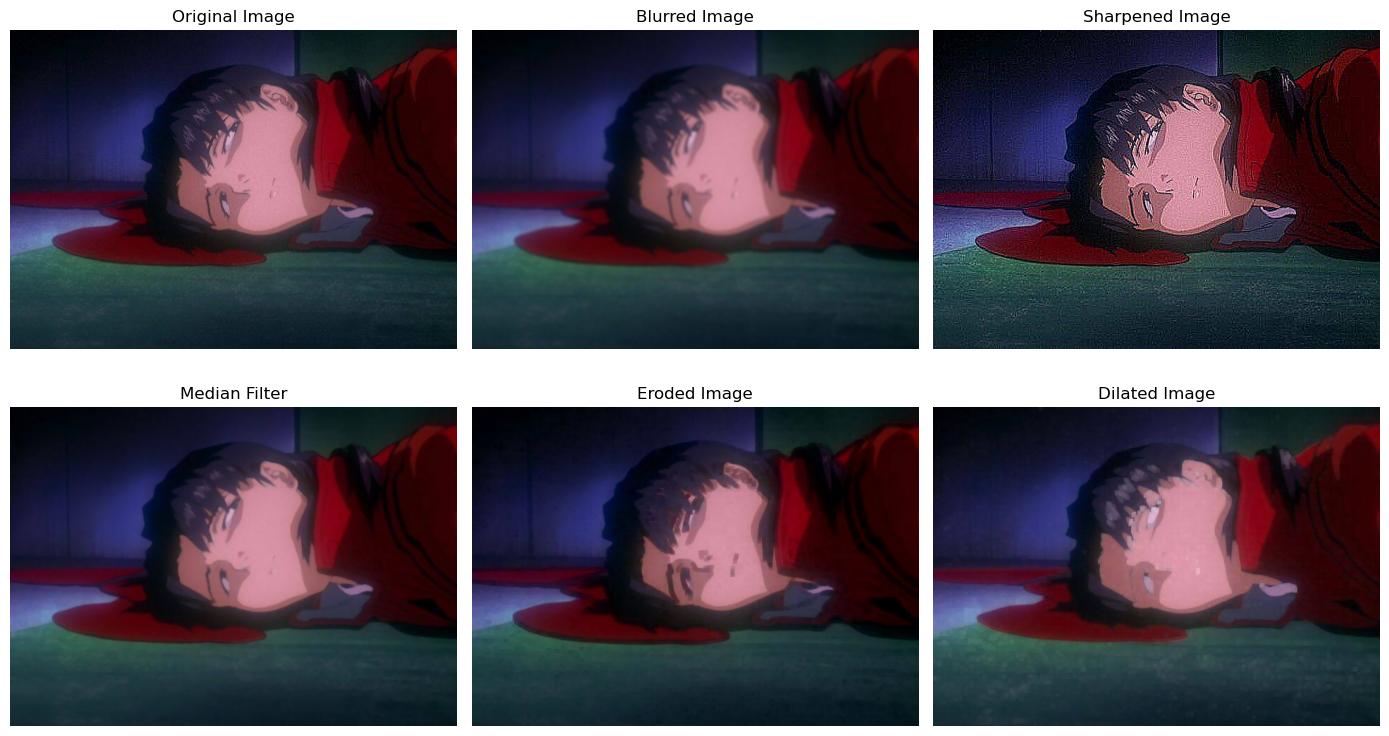

In [63]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_filtered_image)
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(eroded_image)
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(dilated_image)
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Sobel filter

In [61]:
sobel_x = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255, cv2.CV_64F, 0, 1, ksize=3) 
gradient= np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

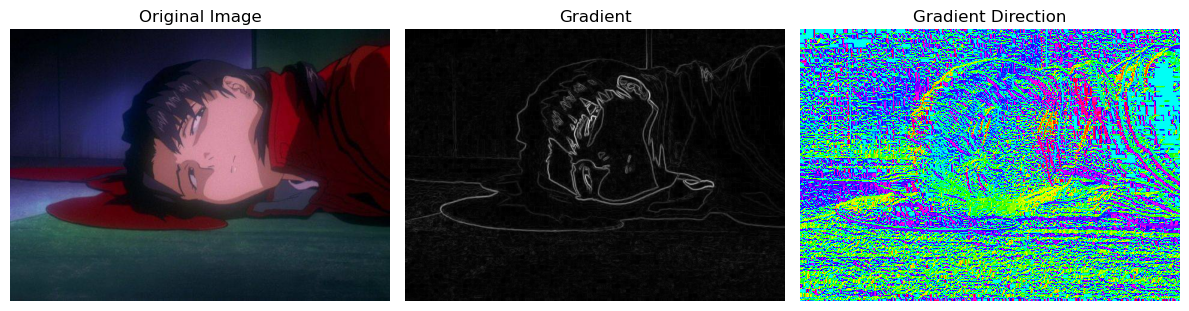

In [62]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_direction, cmap='hsv')
plt.title('Gradient Direction')
plt.axis('off')

plt.tight_layout()
plt.show()

# Watermark

(<matplotlib.image.AxesImage at 0x1535c92b0>,
 (np.float64(-0.5), np.float64(859.5), np.float64(546.5), np.float64(-0.5)))

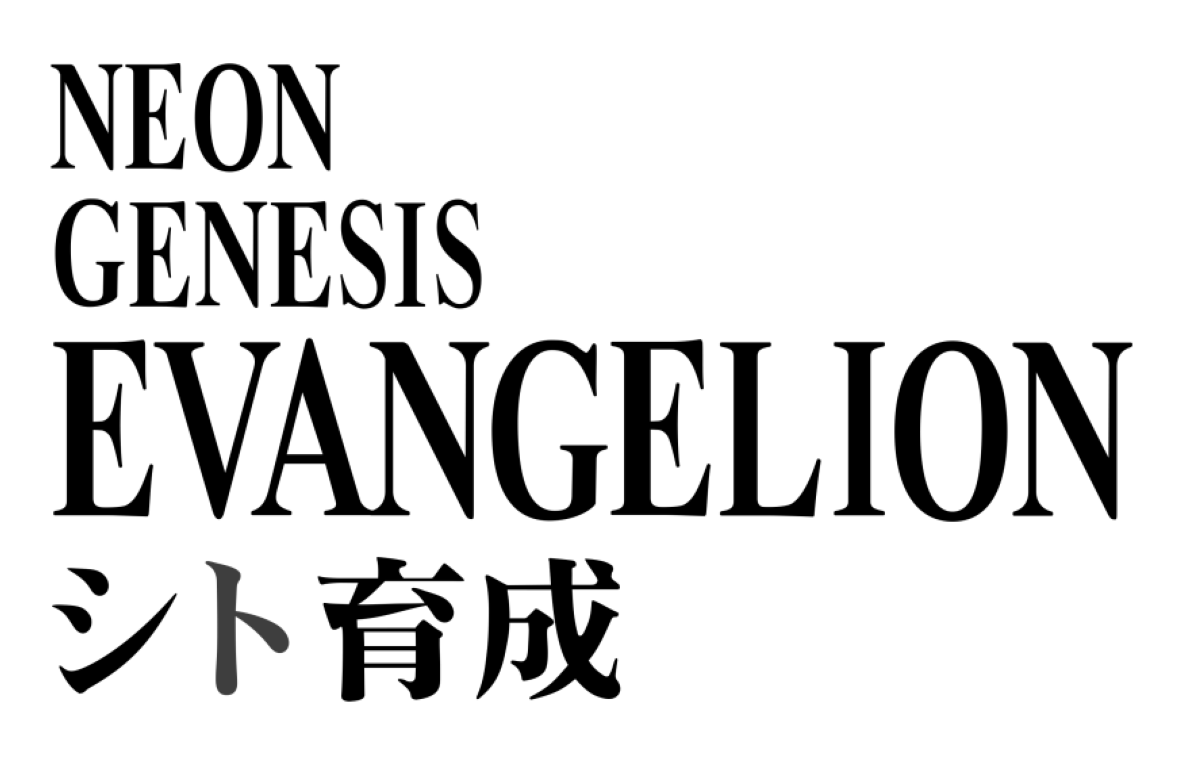

In [21]:
watermark = cv2.imread('../watermark.png')
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)
plt.imshow(watermark, cmap='gray'), plt.axis('off')

In [63]:
def embed_watermark(img, watermark, bit_plane=1):

    image = img.copy()
    
    if len(watermark.shape) != 2:
        raise ValueError("Watermark should be grayscale")

    # Fix shape mismatch
    wm_resized = np.tile(watermark, (int(np.ceil(image.shape[0] / watermark.shape[0])), 
                                     int(np.ceil(image.shape[1] / watermark.shape[1]))))
    wm_resized = wm_resized[:image.shape[0], :image.shape[1]]

    if bit_plane < 1 or bit_plane > 8:
        raise ValueError("Номер бітової площини має бути від 1 до 8.")
    
    blue_channel = image[:, :, 2].copy() 
    mask = 1 << (bit_plane - 1)

    # Clear desired bitplane
    blue_channel = np.bitwise_and(blue_channel, 255 - mask)  
    watermark_bin = (wm_resized > 128).astype(np.uint8)

    # Embed watermark
    blue_channel = np.bitwise_or(blue_channel, watermark_bin * mask)
    image[:, :, 2] = blue_channel

    return image

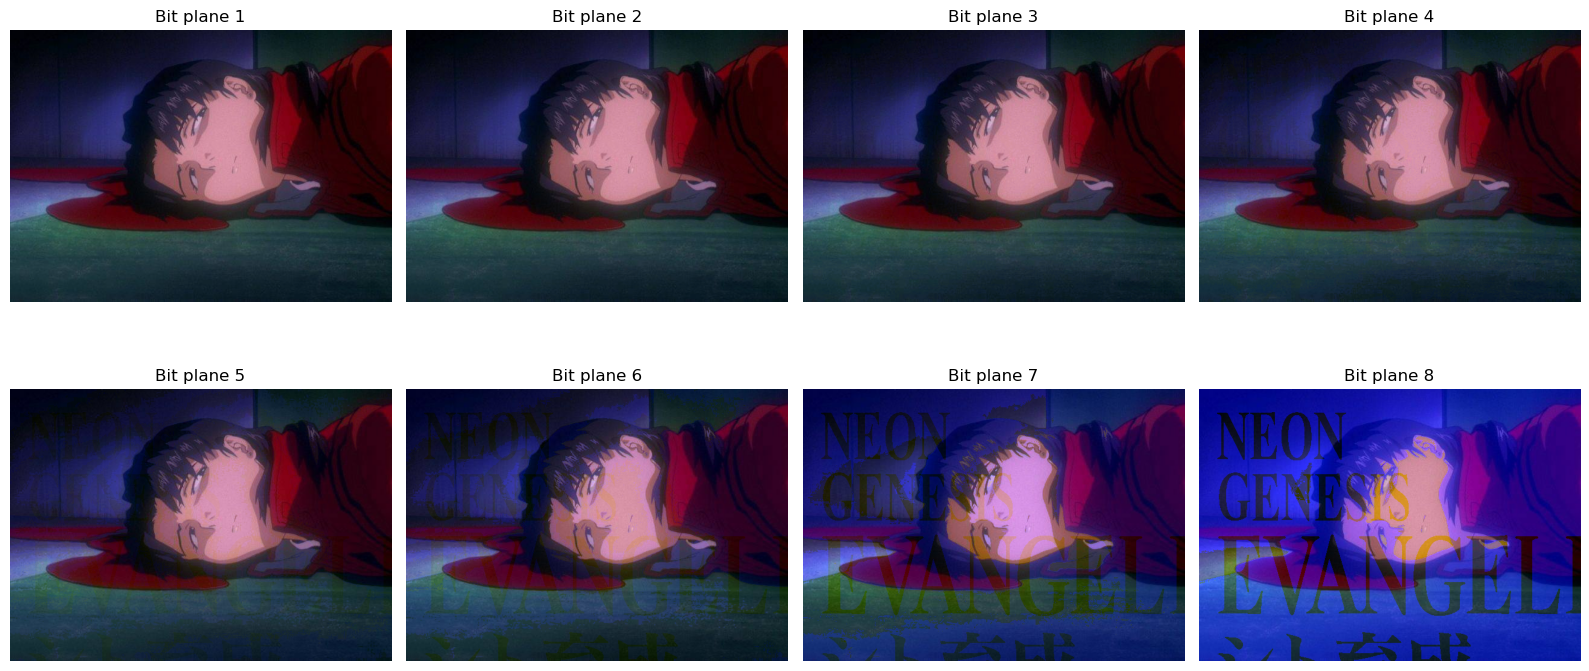

In [64]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 
axes = axes.ravel()  
    
for i in range(8):
    watermarked_image = embed_watermark(img.copy(), watermark, bit_plane=i+1)  
    axes[i].imshow(watermarked_image) 
    axes[i].set_title(f"Bit plane {i+1}")  
    axes[i].axis('off')  

plt.tight_layout()
plt.show()
